In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("NVIDIA (NVDA) - FINANCIAL ANALYSIS & MODELING PROJECT")
print("=" * 60)

NVIDIA (NVDA) - FINANCIAL ANALYSIS & MODELING PROJECT


In [10]:
# Historical Financial Data (in millions USD)
data = {
    'Year': ['FY2020', 'FY2021', 'FY2022', 'FY2023', 'FY2024', 'FY2025Q2'],
    'Revenue': [10918, 16675, 26914, 26974, 60922, 46700],
    'Net_Income': [2796, 4332, 9752, 4368, 29760, 26500],
    'Operating_Income': [3165, 4532, 10041, 4224, 32972, 28800],
    'Total_Assets': [17315, 28791, 44187, 41182, 65728, 72000],
    'Total_Equity': [12903, 19877, 26612, 22101, 42984, 47000],
    'Shares_Outstanding': [2460, 2490, 2500, 2470, 24600, 24600]
    }


df = pd.DataFrame(data)
print("\n📊 Financial Data Loaded:")
print(df.to_string(index=False))



📊 Financial Data Loaded:
    Year  Revenue  Net_Income  Operating_Income  Total_Assets  Total_Equity  Shares_Outstanding
  FY2020    10918        2796              3165         17315         12903                2460
  FY2021    16675        4332              4532         28791         19877                2490
  FY2022    26914        9752             10041         44187         26612                2500
  FY2023    26974        4368              4224         41182         22101                2470
  FY2024    60922       29760             32972         65728         42984               24600
FY2025Q2    46700       26500             28800         72000         47000               24600


In [11]:
print("\n" + "=" * 60)
print("CALCULATING FINANCIAL RATIOS")
print("=" * 60)

# Profit Margins
df['Profit_Margin_%'] = (df['Net_Income'] / df['Revenue'] * 100).round(2)
df['Operating_Margin_%'] = (df['Operating_Income'] / df['Revenue'] * 100).round(2)

# Returns
df['ROE_%'] = (df['Net_Income'] / df['Total_Equity'] * 100).round(2)
df['ROA_%'] = (df['Net_Income'] / df['Total_Assets'] * 100).round(2)

# Per Share Metrics
df['EPS'] = (df['Net_Income'] / df['Shares_Outstanding']).round(2)
df['Book_Value_Per_Share'] = (df['Total_Equity'] / df['Shares_Outstanding']).round(2)

# Revenue Growth
df['Revenue_Growth_%'] = df['Revenue'].pct_change() * 100
df['Revenue_Growth_%'] = df['Revenue_Growth_%'].round(2)

print("\n📈 Key Metrics Summary:")
metrics_display = df[['Year', 'Profit_Margin_%', 'Operating_Margin_%',
                       'ROE_%', 'EPS', 'Revenue_Growth_%']]
print(metrics_display.to_string(index=False))


CALCULATING FINANCIAL RATIOS

📈 Key Metrics Summary:
    Year  Profit_Margin_%  Operating_Margin_%  ROE_%  EPS  Revenue_Growth_%
  FY2020            25.61               28.99  21.67 1.14               NaN
  FY2021            25.98               27.18  21.79 1.74             52.73
  FY2022            36.23               37.31  36.65 3.90             61.40
  FY2023            16.19               15.66  19.76 1.77              0.22
  FY2024            48.85               54.12  69.24 1.21            125.85
FY2025Q2            56.75               61.67  56.38 1.08            -23.34


In [12]:
print("\n" + "=" * 60)
print("REVENUE FORECASTING MODEL")
print("=" * 60)

# Forecast parameters
FORECAST_YEARS = 3
GROWTH_RATE = 0.25  # 25% annual growth

# Get latest revenue
latest_revenue = df['Revenue'].iloc[-1]
latest_year = df['Year'].iloc[-1]

# Generate forecast
forecast_data = []
for i in range(1, FORECAST_YEARS + 1):
    projected_revenue = latest_revenue * (1 + GROWTH_RATE) ** i
    forecast_data.append({
        'Year': f'FY{2025 + i}',
        'Revenue': round(projected_revenue, 0),
        'Type': 'Forecast'
    })

forecast_df = pd.DataFrame(forecast_data)

print(f"\n🔮 Revenue Forecast (Growth Rate: {GROWTH_RATE*100}%)")
print(forecast_df.to_string(index=False))


REVENUE FORECASTING MODEL

🔮 Revenue Forecast (Growth Rate: 25.0%)
  Year  Revenue     Type
FY2026  58375.0 Forecast
FY2027  72969.0 Forecast
FY2028  91211.0 Forecast


In [13]:
print("\n" + "=" * 60)
print("VALUATION ANALYSIS")
print("=" * 60)

# Latest metrics for valuation
latest_eps = df['EPS'].iloc[-1]
latest_net_income = df['Net_Income'].iloc[-1]
latest_shares = df['Shares_Outstanding'].iloc[-1]

# Model 1: P/E Multiple Valuation
PE_RATIO = 40  # Target P/E multiple
target_price_pe = latest_eps * PE_RATIO

print(f"\n💰 P/E Multiple Valuation:")
print(f"   Current EPS: ${latest_eps}")
print(f"   Target P/E Ratio: {PE_RATIO}x")
print(f"   Target Price: ${target_price_pe:.2f}")

# Model 2: Simplified DCF
DISCOUNT_RATE = 0.10  # 10% WACC
TERMINAL_GROWTH = 0.03  # 3%
FCF_CONVERSION = 0.85  # 85% of net income

fcf = latest_net_income * FCF_CONVERSION
dcf_value = 0

print(f"\n📊 Discounted Cash Flow (DCF) Model:")
print(f"   Starting FCF: ${fcf:.0f}M")

for year in range(1, 6):
    fcf = fcf * (1 + GROWTH_RATE)
    pv = fcf / (1 + DISCOUNT_RATE) ** year
    dcf_value += pv
    print(f"   Year {year}: FCF ${fcf:.0f}M → PV ${pv:.0f}M")

# Terminal value
terminal_value = (fcf * (1 + TERMINAL_GROWTH)) / (DISCOUNT_RATE - TERMINAL_GROWTH)
pv_terminal = terminal_value / (1 + DISCOUNT_RATE) ** 5
dcf_value += pv_terminal

fair_value_per_share = dcf_value / latest_shares

print(f"\n   Terminal Value: ${terminal_value:.0f}M")
print(f"   PV of Terminal: ${pv_terminal:.0f}M")
print(f"   Total Enterprise Value: ${dcf_value:.0f}M")
print(f"   Fair Value per Share: ${fair_value_per_share:.2f}")


VALUATION ANALYSIS

💰 P/E Multiple Valuation:
   Current EPS: $1.08
   Target P/E Ratio: 40x
   Target Price: $43.20

📊 Discounted Cash Flow (DCF) Model:
   Starting FCF: $22525M
   Year 1: FCF $28156M → PV $25597M
   Year 2: FCF $35195M → PV $29087M
   Year 3: FCF $43994M → PV $33053M
   Year 4: FCF $54993M → PV $37561M
   Year 5: FCF $68741M → PV $42683M

   Terminal Value: $1011472M
   PV of Terminal: $628045M
   Total Enterprise Value: $796025M
   Fair Value per Share: $32.36



GENERATING VISUALIZATIONS


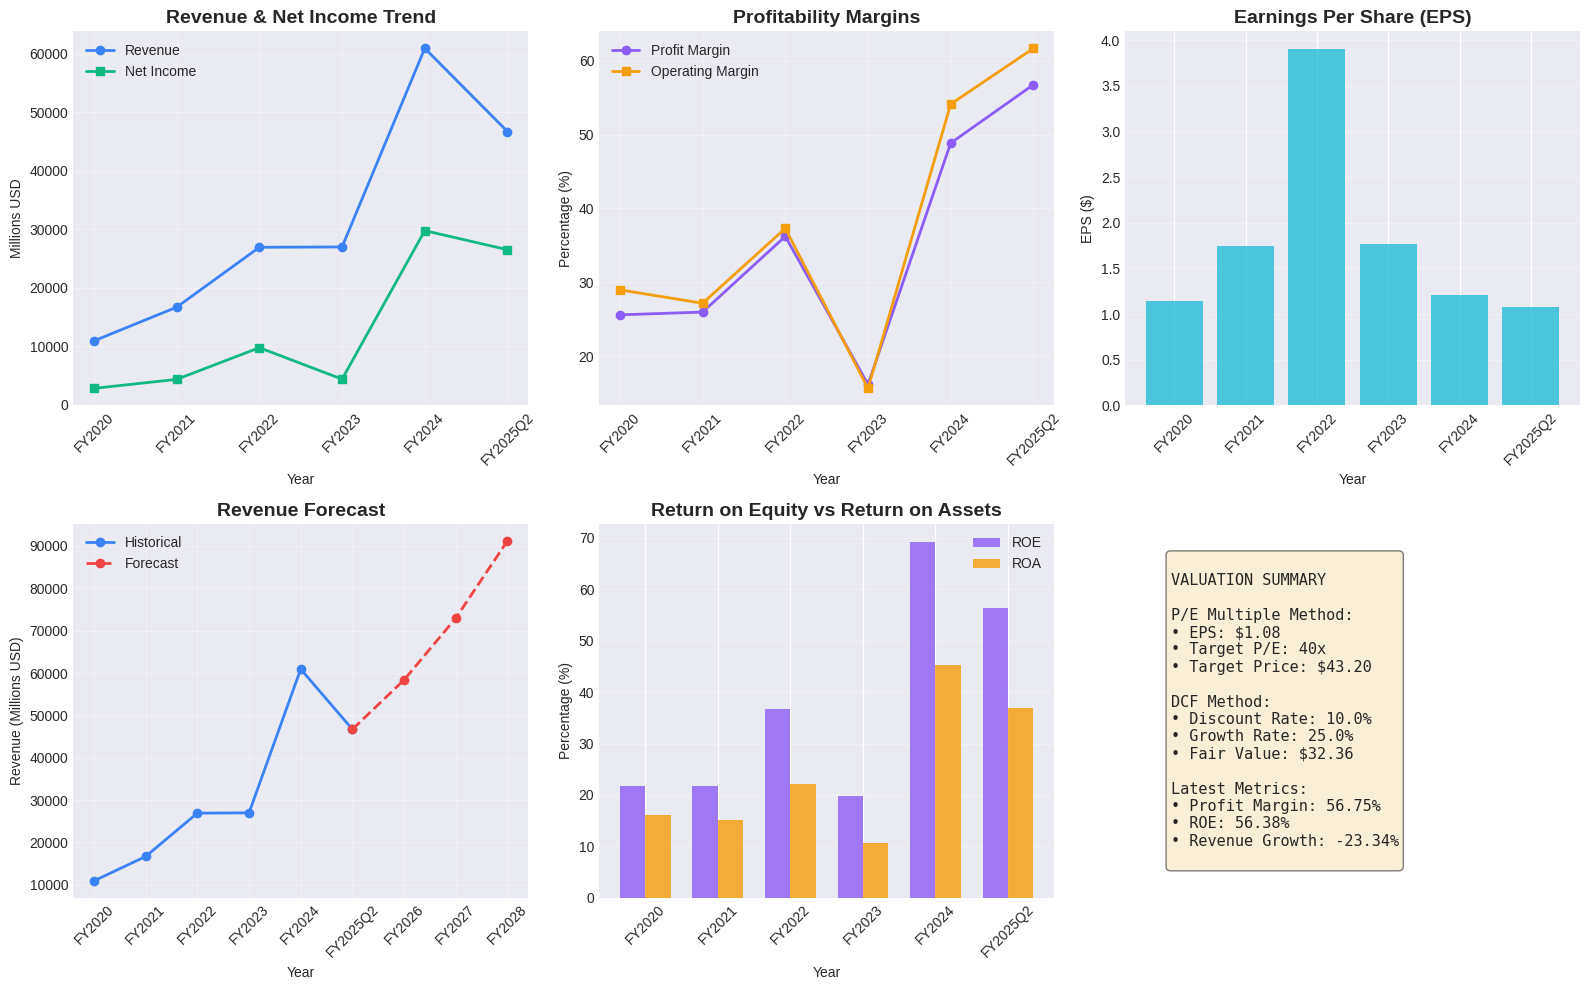

In [16]:
print("\n" + "=" * 60)
print("GENERATING VISUALIZATIONS")
print("=" * 60)

# Create figure with subplots
fig = plt.figure(figsize=(16, 10))

# 1. Revenue & Net Income Trend
ax1 = plt.subplot(2, 3, 1)
ax1.plot(df['Year'], df['Revenue'], marker='o', linewidth=2, label='Revenue', color='#3b82f6')
ax1.plot(df['Year'], df['Net_Income'], marker='s', linewidth=2, label='Net Income', color='#10b981')
ax1.set_title('Revenue & Net Income Trend', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Millions USD')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 2. Profit Margins
ax2 = plt.subplot(2, 3, 2)
ax2.plot(df['Year'], df['Profit_Margin_%'], marker='o', linewidth=2, label='Profit Margin', color='#8b5cf6')
ax2.plot(df['Year'], df['Operating_Margin_%'], marker='s', linewidth=2, label='Operating Margin', color='#f59e0b')
ax2.set_title('Profitability Margins', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 3. EPS Growth
ax3 = plt.subplot(2, 3, 3)
bars = ax3.bar(df['Year'], df['EPS'], color='#06b6d4', alpha=0.7)
ax3.set_title('Earnings Per Share (EPS)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('EPS ($)')
ax3.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)

# 4. Revenue Forecast
ax4 = plt.subplot(2, 3, 4)
# Historical
ax4.plot(df['Year'], df['Revenue'], marker='o', linewidth=2, label='Historical', color='#3b82f6')
# Forecast
forecast_years = [df['Year'].iloc[-1]] + forecast_df['Year'].tolist()
forecast_revenues = [df['Revenue'].iloc[-1]] + forecast_df['Revenue'].tolist()
ax4.plot(forecast_years, forecast_revenues, marker='o', linewidth=2,
         linestyle='--', label='Forecast', color='#ef4444')
ax4.set_title('Revenue Forecast', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Revenue (Millions USD)')
ax4.legend()
ax4.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 5. ROE & ROA
ax5 = plt.subplot(2, 3, 5)
x = np.arange(len(df['Year']))
width = 0.35
ax5.bar(x - width/2, df['ROE_%'], width, label='ROE', color='#8b5cf6', alpha=0.8)
ax5.bar(x + width/2, df['ROA_%'], width, label='ROA', color='#f59e0b', alpha=0.8)
ax5.set_title('Return on Equity vs Return on Assets', fontsize=14, fontweight='bold')
ax5.set_xlabel('Year')
ax5.set_ylabel('Percentage (%)')
ax5.set_xticks(x)
ax5.set_xticklabels(df['Year'], rotation=45)
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# 6. Valuation Summary
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
valuation_text = f"""
VALUATION SUMMARY

P/E Multiple Method:
• EPS: ${latest_eps}
• Target P/E: {PE_RATIO}x
• Target Price: ${target_price_pe:.2f}

DCF Method:
• Discount Rate: {DISCOUNT_RATE*100}%
• Growth Rate: {GROWTH_RATE*100}%
• Fair Value: ${fair_value_per_share:.2f}

Latest Metrics:
• Profit Margin: {df['Profit_Margin_%'].iloc[-1]}%
• ROE: {df['ROE_%'].iloc[-1]}%
• Revenue Growth: {df['Revenue_Growth_%'].iloc[-1]}%
"""
ax6.text(0.1, 0.5, valuation_text, fontsize=11, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round',
         facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('nvidia_financial_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
print("\n" + "=" * 60)
print("KEY INSIGHTS & SUMMARY")
print("=" * 60)

print(f"""
📌 FINANCIAL PERFORMANCE:
   • Latest Revenue: ${df['Revenue'].iloc[-1]:,.0f}M
   • Latest Net Income: ${df['Net_Income'].iloc[-1]:,.0f}M
   • Profit Margin: {df['Profit_Margin_%'].iloc[-1]}%
   • Latest EPS: ${df['EPS'].iloc[-1]}

📈 GROWTH METRICS:
   • Revenue CAGR (5yr): {((df['Revenue'].iloc[-1]/df['Revenue'].iloc[0])**(1/5)-1)*100:.1f}%
   • Recent Growth Rate: {df['Revenue_Growth_%'].iloc[-1]}%

💡 VALUATION:
   • P/E Target Price: ${target_price_pe:.2f}
   • DCF Fair Value: ${fair_value_per_share:.2f}

✅ STRENGTHS:
   • Market leader in AI/GPU chips
   • Strong profit margins ({df['Profit_Margin_%'].iloc[-1]}%)
   • High ROE ({df['ROE_%'].iloc[-1]}%)
   • Consistent growth trajectory

⚠️  CONSIDERATIONS:
   • High valuation multiples
   • Market concentration risk
   • Competition from AMD, Intel
   • Geopolitical risks (China)
""")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)


KEY INSIGHTS & SUMMARY

📌 FINANCIAL PERFORMANCE:
   • Latest Revenue: $46,700M
   • Latest Net Income: $26,500M
   • Profit Margin: 56.75%
   • Latest EPS: $1.08

📈 GROWTH METRICS:
   • Revenue CAGR (5yr): 33.7%
   • Recent Growth Rate: -23.34%

💡 VALUATION:
   • P/E Target Price: $43.20
   • DCF Fair Value: $32.36

✅ STRENGTHS:
   • Market leader in AI/GPU chips
   • Strong profit margins (56.75%)
   • High ROE (56.38%)
   • Consistent growth trajectory

⚠️  CONSIDERATIONS:
   • High valuation multiples
   • Market concentration risk
   • Competition from AMD, Intel
   • Geopolitical risks (China)


ANALYSIS COMPLETE!
